# Análisis de intervalos

En el notebook anterior, entre otras cosas, hicieron su módulo para desarrollar la aritmética de intervalos, incluyendo además algunas pruebas. El módulo permite hacer las operaciones básicas de intervalos, incluyendo las potencias. Además, vimos que la manera en que uno opera los intervalos influye en la respuesta. Importante es notar que lo que se ha hecho hasta el momento sirve para funciones racionales de la forma $f(x) = p(x) / q(x)$, donde $p(x)$ y $q(x)$ son polinomios en $x$.

El propósito de este notebook es extender lo ya hecho a las *funciones estándares*, que son $\exp(x)$ $\log(x)$, las funciones trigonométricas ($\sin(x)$, $\cos(x)$, $\tan(x)$, etc.), sus inversas ($\arcsin(x)$, etc), y las hiperbólicas ($\sinh(x)$, etc). Combinaciones utilizando las operaciones aritméticas que involucran las funciones estándares (y los polinomios) es lo que constituye a las *funciones elementales*.

## Extensión de funciones a intervalos

Si $f(x)$ es una función elemental *monótona*, su extensión a intervalos intuitivamente es: 
$F([a,b]) = [F(a),F(b)]$. 

Para las funciones monótonas estándares, el intervalo $F([a,b])$ que define la extensión de $f(x)$ al intervalo $[a,b]$ es lo que se llama la *extensión natural a intervalos*, ya que  corresponde a una *cota estrecha* del rango de $f(x)$ para $x\in [a,b]$, que denotaremos $R(f; [a,b])$.

In [3]:
workspace()
using Intervals
using FactCheck
using PyPlot
using Derivatives


INFO: Loading help data...
    ^(Derive,Real) at /home/pablo1/Documents/Tareas/TareasMetodosNumericosAvanzados/Derivatives.jl:127
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(Derive,Integer)
before the new definition.


In [13]:
workspace()
using Intervals
using Derivatives

    ^(Derive,Real) at /home/pablo1/Documents/Tareas/TareasMetodosNumericosAvanzados/Derivatives.jl:127
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(Derive,Integer)
before the new definition.


In [5]:
A=Interval(0,pi)


Interval(3.749399456654644e-33,2.0)

In [26]:
x=Derive(6,1)

Derive(6.0,1.0)

In [27]:
6x+3x

Derive(54.0,9.0)

In [20]:
facts("Pruebas Básicas") do
    A = Interval(1,2)
    B = Interval(3,4)
    C = Interval(4.0,6.0)
    D = Interval(-1,1)
    E = Interval(-2,-1)
    
    @fact A + B => C
    @fact A - B => Interval(-3.0,-1.0)
    @fact A*B => Interval(3,8)
    @fact A/B => Interval(.25,0.6666666666666667)
    @fact midpoint(C) => 5
    @fact contains(B, 1.0) => false
    @fact contains(B, midpoint(B)) => true
    @fact D^2 => Interval(0,1)
    @fact D^3 => Interval(-1,1)
    @fact A+2.0 => Interval(3,4)
    @fact 2.0B => Interval(6,8)
    @fact contains(Interval(0.1,.1),0.1) => true
    @fact Interval(2,1) => Interval(1,2)
    @fact -1.0A => Interval(-2,-1)
    @fact exp(A) => Interval(exp(A.a),exp(A.b))
    @fact log(A) => Interval(log(A.a),log(A.b))
    @fact log(exp(B)) => B
    @fact exp(log(C)) => C
    @fact D^2.3 => Interval(0,1)
    @fact_throws E^1.3
    @fact contains(cos(A),cos(A.a)) => true
    @fact contains(cos(A),cos(A.b)) => true
    
    
end


Pruebas Básicas
Solo se utilizó la parte no negativa del intervalo
  Failure   :: (line:-1) :: got Derive(1.0,0.0)
    Derive(1.0) => Derive(1.0,0.0)
Out of 23 total facts:
  Verified: 22
  Failed:   1


delayed_handler (generic function with 4 methods)

[1] Amplía tu módulo de intervalos para que incluya la extensión de las funciones estándres monótonas a intervalos. En el caso de las potencias, extiénde lo que ya hayas hecho para que incluya potencias reales. Incluye algunas pruebas en `pruebas.jl` que muestren que lo que has hecho funciona *bien*.

[2] ¿Cómo definirías la extensión a intervalos para funciones no monótonas? Repite [1] para este caso.

Para las funciones periódicas hay que tratar con puntos críticos. Por ejemplo, en el caso de coseno, si el intervalo que se utiliza como dominio contiene un número de la forma $n\pi$, sabemos que el intervalo que obtenemos necesariamente tiene como extremo superior el valor 1 o -1 como extremo inferior dependiendo de la paridad de $n$. Basta fuera de eso con evaluar los extremos en caso de no encontrar un punto crítico. 

[3] La extensión natural del intervalo para $f(x)=x/(1+x^2)$ es $F(\mathbf{x})=\mathbf{x}/(1+\mathbf{x}^2)$. ¿Cuál es la extensión natural del intervalo para $\mathbf{x}=[1,2]$? ¿Cómo se compara con el rango $R(f; [1,2])$. Ilustra los resultados con una gráfica.

In [36]:
function f(x::Interval)
    
    return(x/(x^2+1.0))
end
    
f(Interval(1,2))

Interval(0.19999999999999998,1.0)

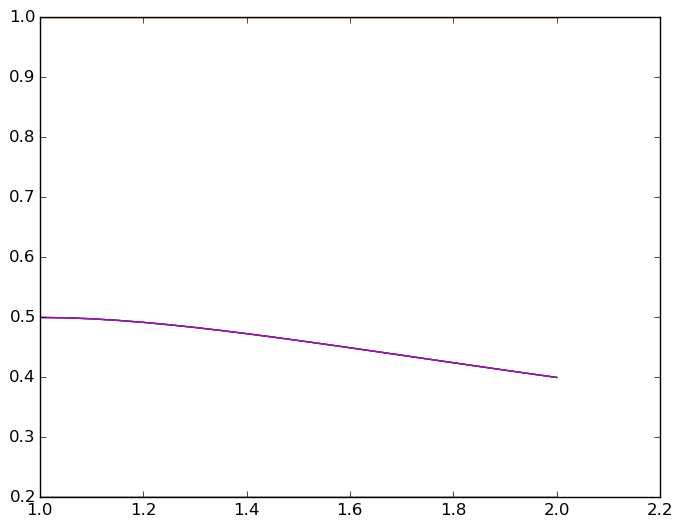

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa02e3ae0d0>
 PyObject <matplotlib.lines.Line2D object at 0x7fa02e347410>
 PyObject <matplotlib.lines.Line2D object at 0x7fa02e350310>

In [60]:
x1 = [1:+.05:2]
y1 = [x/(1+x^2) for x in x1]
ysup = [1 for x in x1]
ysub = [.2 for x in x1]

plot(x1,y1,x1,ysup,x1,ysub)

Claramente, el intervalo obtenido mediante la extensión natural contiene el rango de la función. Sin embargo, es claramente más amplio que el rango de la función. Existen muchos valores en nuestro intervalo que no se encuentran en el rango.

El **Teorema Fundamental del Análisis de Intervalos** afirma que dada una función *elemental* $f(x)$ y una extensión natural a intervalos $F$, tal que $F(\mathbf{x})$ está bien definida para algún intervalo $\mathbf{x}$, entonces:

1. Si $\mathbf{z} \subseteq \mathbf{z'} \subseteq \mathbf{x} \Longrightarrow F(\mathbf{z}) \subseteq F(\mathbf{z'}),\quad$ "inclusión isotónica" (*inclusion isotonicity*)

2. $R(f;\mathbf{x}) \subseteq F(\mathbf{x}),\quad$ "acotamiento del rango" (*range enclosure*)


La segunda propiedad afirma que la extensión natural $F(\mathbf{x})$ contiene al rango, lo que entonces acota el rango de $f(x)$ con $F(\mathbf{x})$. 

De aquí, dado que si $y\notin F(\mathbf{x}) \Longrightarrow y\notin R(f;\mathbf{x})$, entonces podemos usar este resultado cuando se buscan las raíces de alguna función $f(x)$ en un intervalo: Si $ 0 \notin F(\mathbf{x})$ entonces $f(x)$ **no** tiene raíces en $\mathbf{x}$.

[4] Demuestra que $f(x) = (\sin(x)-x^2+1)\cos(x)$ no tiene raíces en $\mathbf{x}=[0,1/2]$. Ilustra que el argumento es correcto gráficamente.

In [63]:
s = Interval(0,.5)

contains((sin(s)-s^2+1.0)*cos(s),0)

#Contains revisa si el intervalo proporcionado como primer argumento contiene el flotante proporcionado como segundo
#argumento. Como el cero no está en el intervalo no puede estar en el rango de la función f

false

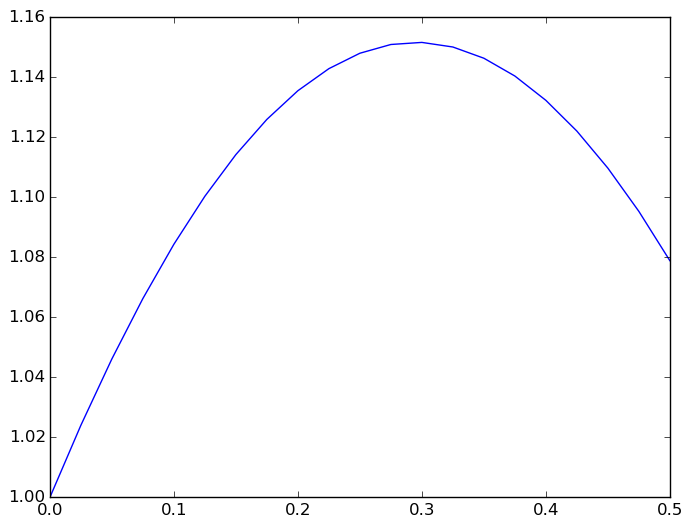

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f86ad093950>

In [6]:
 x3 = [0:.025:.5]
y3 = [(sin(x)-x^2+1.0)*cos(x) for x in x3]

plot(x3,y3)

## Rutina para encontrar raíces de una función

Ya hemos llegado al punto de poder resolver el siguiente problema:

> Dada una función $f(x)$ y un intervalo $X$, encuentra las raíces de $f$ dentro de $X$.

[5] Escribe un código quer utiliza la propiedad de los ceros para encontrar los intervalos donde *podría haber* un cero.

In [26]:
#La funcion cuyas raices se desean calcular

function F(x)
    
    return(sin(x)*(x^-1.0))
    
end


#Toma un arreglo de intervalos y quita todos los intervalos que no contienen val
    

function RemoveUnwanted(x,val::Float64) 
    temp = Interval[]
    
    for i=1:length(x)
        
        if (contains(F(x[i]),val) == true)
            push!(temp,x[i])
        end
    end
    
    temp
end

#Toma un intervalo y regresa un array que contiene los dos intervalos obtenidos de dividir el intervalo de entrada

function BisectInterval(x::Interval)
    
    return([Interval(x.a,midpoint(x)),Interval(midpoint(x),x.b)])
    
end

#Toma un arreglo de intervalos y regresa aplica la función anterior a cada uno

function SplitIntervals(x)
    
    temp = Interval[]
    
    for i=1:length(x)
        append!(temp,BisectInterval(x[i]))
    end
    
    temp
    
end


function IntervalRootFinder(x::Interval)
    
    ab=Interval[]

    push!(ab,x)
    
    if contains(ab[1],0)==false
        return("El intervalo proporcionado no contiene raíces")
    end
    
    for i = 1:25
        
        ab=SplitIntervals(ab)
        ab=RemoveUnwanted(ab,0.0)
    end
    
    for i = 1:length(ab)
        
        if contains(d(ab[i]),0) == false
            println(ab[i])
        end
    end  
end

test = [Interval(-1,1),Interval(-1,-2),Interval(pi,12),Interval(11,12)]

RemoveUnwanted(test,0.0)

Solo se utilizó la parte no negativa del intervalo


LoadError: Intervalo completamente negativo, al menos parte del intervalo debe ser no negativo
while loading In[26], in expression starting on line 75

In [66]:


BisectInterval(Interval(-1,1))

2-element Array{Interval,1}:
 Interval(-1.0,0.0)
 Interval(0.0,1.0) 

In [69]:
append!(test,[Interval(0,0),Interval(1,1)])

7-element Array{Interval,1}:
 Interval(-1.0,1.0) 
 Interval(-2.0,-1.0)
 Interval(1.0,12.0) 
 Interval(-1.0,11.0)
 Interval(0.0,0.0)  
 Interval(0.0,0.0)  
 Interval(1.0,1.0)  

[6] Extiende tu código para utilizar la derivada $f'$, dada a mano, para demostrar (cuando se puede) que el cero es *único* en el intervalo.

Lo importante es revisar que la derivada no se haga ceron dentro de nuestros intervalos respuesta. Esto se hace arriba. Solo reviso al final, ya que hay que esperar hasta que los intervalos sean pequeños antes de revisar para no atrapar falsos positivos.


In [39]:
3//2

3//2

[7] Utiliza la *diferenciación automática* del notebook 6 para que no tengas que especificar la derivada a mano.

In [27]:
function IntervalRootFinder(x::Interval)
    
    ab=Interval[]

    push!(ab,x)
    
    if contains(ab[1],0)==false
        return("El intervalo proporcionado no contiene raíces")
    end
    
    for i = 1:35
        
        ab=SplitIntervals(ab)
        ab=RemoveUnwanted(ab,0.0)
    end
    
    for i = 1:length(ab)
        
        x=Derive(midpoint(ab[i]),1)
        
        if F(x) != 0.0
            println("Posible raíz en el intervalo [$(ab[i].a),$(ab[i].b)]")
            println("En x = $(midpoint(ab[i])) la función vale aproximadamente $(midpoint(F(ab[i]))) ")
            println()
        end
    end  
end

IntervalRootFinder(Interval(-1,4))

Solo se utilizó la parte no negativa del intervalo
Posible raíz en el intervalo [3.1415926534682512,3.1415926536137704]
En x = 3.141592653541011 la función vale aproximadamente 1.5527911520322325e-11 

